In [1]:
from google.colab import userdata
token = userdata.get('hf_token')

In [2]:
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
%%time
# 4-bit quantization config
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

token = "your-token"
model_name = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=token)
model = AutoModelForCausalLM.from_pretrained(model_name, use_auth_token=token,
                                             quantization_config=quantization_config,
                                             device_map="auto")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:862: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

CPU times: user 35.6 s, sys: 40.8 s, total: 1min 16s
Wall time: 3min 26s


MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): Mist

In [12]:
%%time

# Extract the answer
def extract_first_number(text):
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", text)
    if matches:
        return float(matches[-1])
    return None

# Query Mistral 7B locally with multivariate input
def query_mistral(input_series, feature_names):
    feature_data = input_series.T
    input_str = ", ".join([f"{name}: {values.tolist()}" for name, values in zip(feature_names, feature_data)])
    print('->',input_str)
    prompt = f"Given the past 7 days of weather data: {input_str}, predict the next day's temperature. Reply with a number."

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=10,
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"\nRaw Mistral output: {response}")
    predicted_temp = extract_first_number(response)
    return predicted_temp if predicted_temp is not None else 0.0

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [20]:
data = np.load('/content/weather_preprocessed_last100.npz')

X_combos = {
    'Combo1': data['X_combo1'],
    'Combo2': data['X_combo2'],
    'Combo3': data['X_combo3'],
    'Combo4': data['X_combo4'],
    'Combo5': data['X_combo5']
}
y = data['y']

feature_combos = {
    'Combo1': ['Temperature (C)'],
    'Combo2': ['Temperature (C)', 'Humidity'],
    'Combo3': ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)'],
    'Combo4': ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)'],
    'Combo5': ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
}

y_actual_10 = y[:10]
X_combos_10 = {combo: X[:10] for combo, X in X_combos.items()}

y_actual_50 = y[:50]
X_combos_50 = {combo: X[:50] for combo, X in X_combos.items()}


Predicting for Combo1:
⏳ Predicting for day 1/10
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], predict the next day's temperature. Reply with a number.
A: 12.5
⏳ Predicting for day 2/10
-> Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8], predict the next day's temperature. Reply with a number.
Answer: 12.5
⏳ Predicting for day 3/10
-> Temperature (C): [15.366666666666664, 15.366666666666664, 14.327777777777776, 13.3

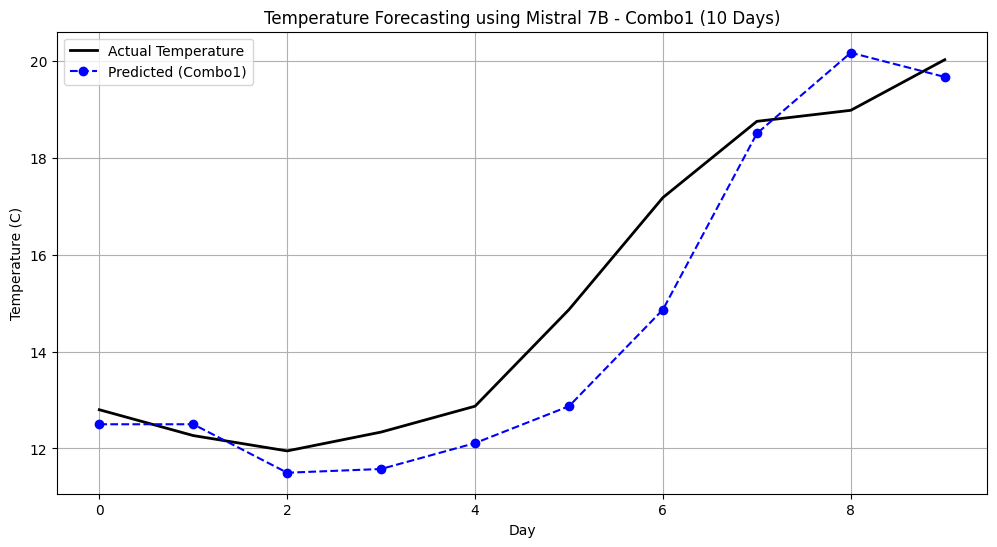


Metrics for Combo1:
RMSE: 1.1150 °C
MAE: 0.8607 °C
R²: 0.8659

Predicting for Combo2:
⏳ Predicting for day 1/10
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], predict the next day's temperature. Reply with a number.
A: 14.327
⏳ Predicting for day 2/10
-> Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8], Humidity: [0.93, 0.96, 0.94, 0.93, 0.96, 0.93, 0.96]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 1

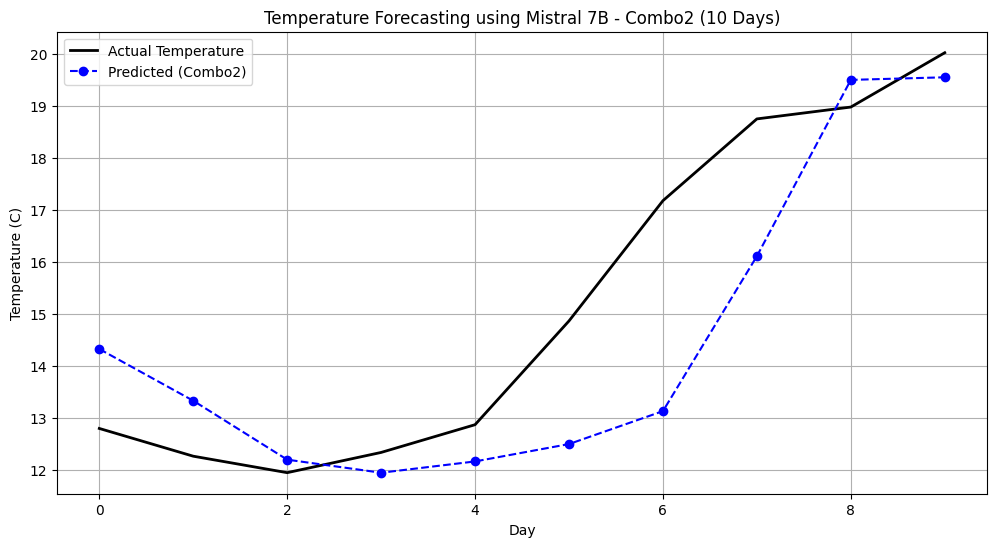


Metrics for Combo2:
RMSE: 1.8331 °C
MAE: 1.3984 °C
R²: 0.6374

Predicting for Combo3:
⏳ Predicting for day 1/10
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], predict the next day's temperature. Reply with a number.
A: 12.877
⏳ Predicting for day 2/10
-> Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8], Hum

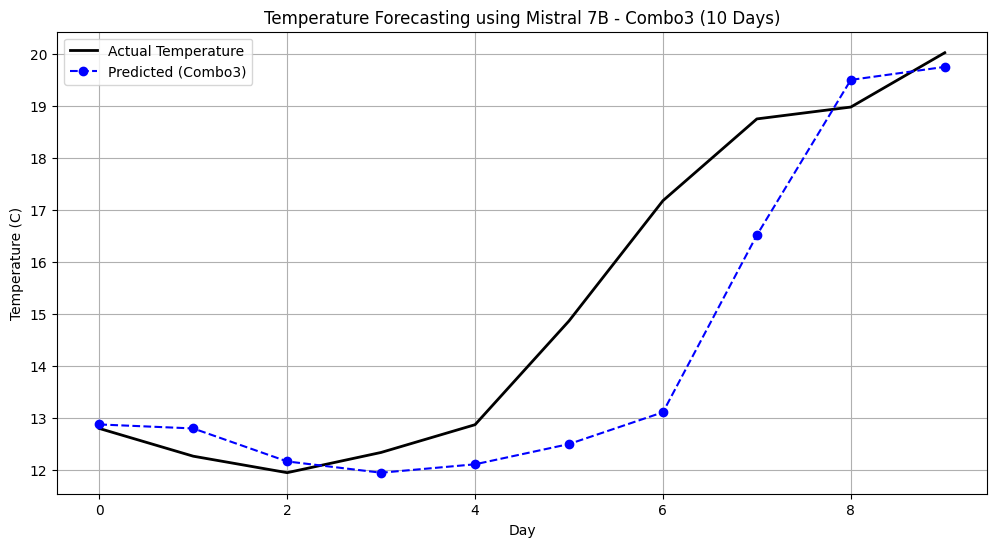


Metrics for Combo3:
RMSE: 1.6896 °C
MAE: 1.1439 °C
R²: 0.6920

Predicting for Combo4:
⏳ Predicting for day 1/10
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517, 15.021300000000002, 15.7297, 15.7297, 14.876400000000002]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517, 15.021300000000002, 15.7297, 15.7297, 14.876400000000002], predict the next day's temp

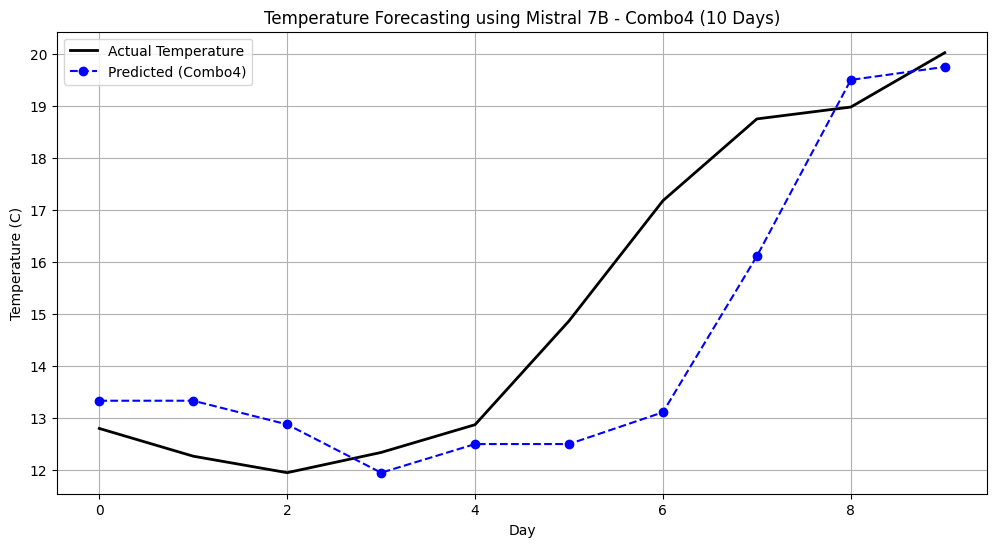


Metrics for Combo4:
RMSE: 1.7895 °C
MAE: 1.3155 °C
R²: 0.6545

Predicting for Combo5:
⏳ Predicting for day 1/10
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517, 15.021300000000002, 15.7297, 15.7297, 14.876400000000002], Pressure (millibars): [1013.41, 1013.37, 1013.77, 1013.96, 1013.77, 1013.77, 1013.92]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517,

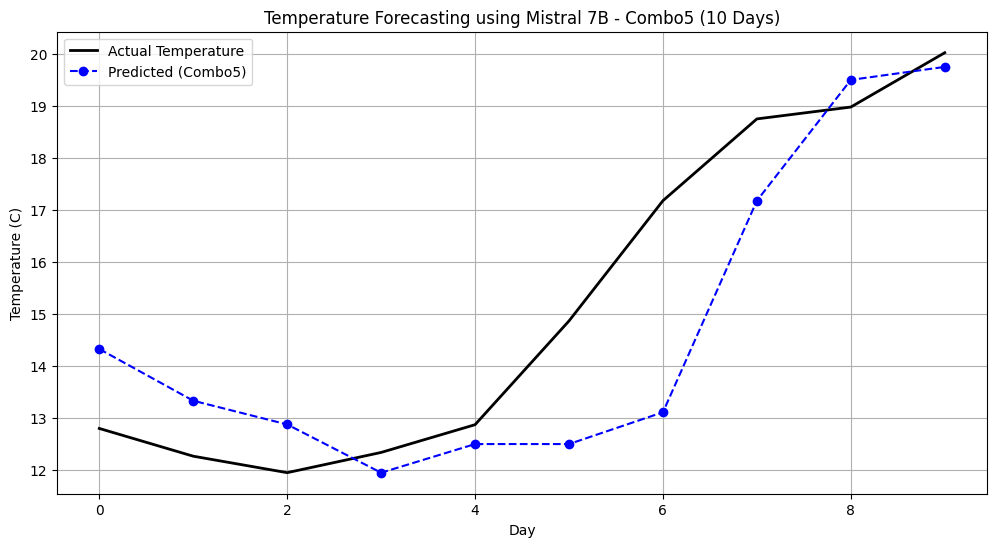


Metrics for Combo5:
RMSE: 1.7199 °C
MAE: 1.3083 °C
R²: 0.6808


In [21]:
# Dictionary to store predictions and metrics
results_10 = {}

# Get predictions and plot for each combo separately
for combo_name, X_combo_sample in X_combos_10.items():
    print(f"\nPredicting for {combo_name}:")
    combo_predictions = []
    for idx, input_series in enumerate(X_combo_sample):
        print(f"⏳ Predicting for day {idx + 1}/{len(X_combo_sample)}")
        pred = query_mistral(input_series, feature_combos[combo_name])
        combo_predictions.append(pred)

    # Store predictions
    results_10[combo_name] = {
        'predictions': combo_predictions,
        'rmse': np.sqrt(mean_squared_error(y_actual_10, combo_predictions)),
        'mae': mean_absolute_error(y_actual_10, combo_predictions),
        'r2': r2_score(y_actual_10, combo_predictions)
    }

    # Plot actual vs predicted for this combination
    plt.figure(figsize=(12, 6))
    plt.plot(range(10), y_actual_10, label='Actual Temperature', color='black', linewidth=2)
    plt.plot(range(10), combo_predictions, label=f'Predicted ({combo_name})', linestyle='--', marker='o', color='blue')
    plt.xlabel('Day')
    plt.ylabel('Temperature (C)')
    plt.title(f'Temperature Forecasting using Mistral 7B - {combo_name} (10 Days)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print individual metrics (optional, can remove if table is sufficient)
    print(f"\nMetrics for {combo_name}:")
    print(f"RMSE: {results_10[combo_name]['rmse']:.4f} °C")
    print(f"MAE: {results_10[combo_name]['mae']:.4f} °C")
    print(f"R²: {results_10[combo_name]['r2']:.4f}")


In [23]:
summary_data_10 = {
    'Combination': [f"{combo_name}: {', '.join(feature_combos[combo_name])}" for combo_name in results_10.keys()],
    'RMSE (°C)': [results_10[combo_name]['rmse'] for combo_name in results_10.keys()],
    'MAE (°C)': [results_10[combo_name]['mae'] for combo_name in results_10.keys()],
    'R²': [results_10[combo_name]['r2'] for combo_name in results_10.keys()]
}
summary_df_10 = pd.DataFrame(summary_data_10)

# print("\nSummary of All Combinations:")
# print(summary_df_10.to_string(index=False, float_format="{:.4f}".format))

,Combination,RMSE (°C),MAE (°C),R²
0,Combo1: Temperature (C),1.114951,0.860733,0.865873
1,"Combo2: Temperature (C), Humidity",1.833124,1.398433,0.637433
2,"Combo3: Temperature (C), Humidity, Wind Speed ...",1.689552,1.143933,0.692002
3,"Combo4: Temperature (C), Humidity, Wind Speed ...",1.789469,1.315533,0.654496
4,"Combo5: Temperature (C), Humidity, Wind Speed ...",1.719873,1.308333,0.680848



Predicting for Combo1:
⏳ Predicting for day 1/50
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], predict the next day's temperature. Reply with a number.
A: 12.5
⏳ Predicting for day 2/50
-> Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8], predict the next day's temperature. Reply with a number.
Answer: 12.5
⏳ Predicting for day 3/50
-> Temperature (C): [15.366666666666664, 15.366666666666664, 14.327777777777776, 13.3

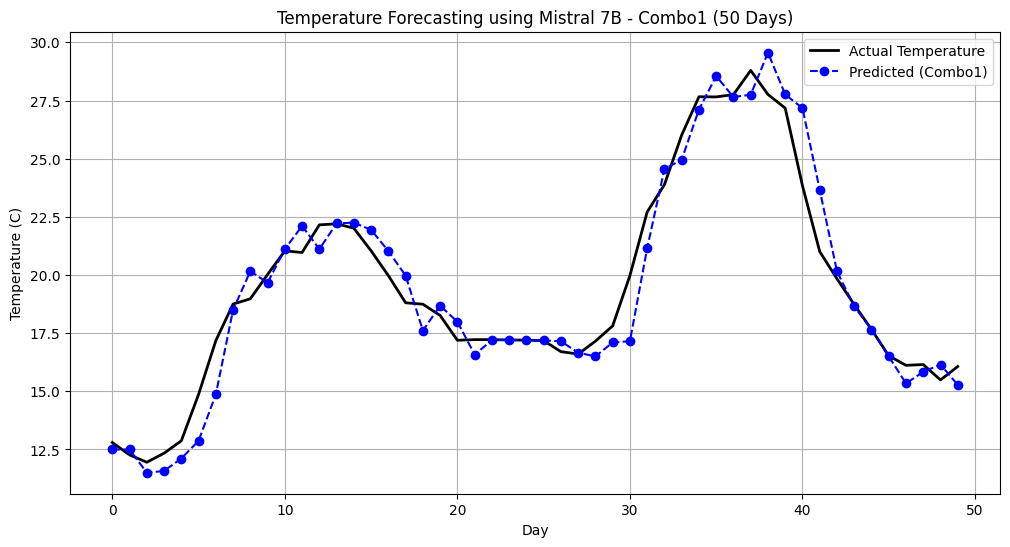


Metrics for Combo1:
RMSE: 1.0918 °C
MAE: 0.7846 °C
R²: 0.9363

Predicting for Combo2:
⏳ Predicting for day 1/50
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], predict the next day's temperature. Reply with a number.
A: 14.327
⏳ Predicting for day 2/50
-> Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8], Humidity: [0.93, 0.96, 0.94, 0.93, 0.96, 0.93, 0.96]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 1

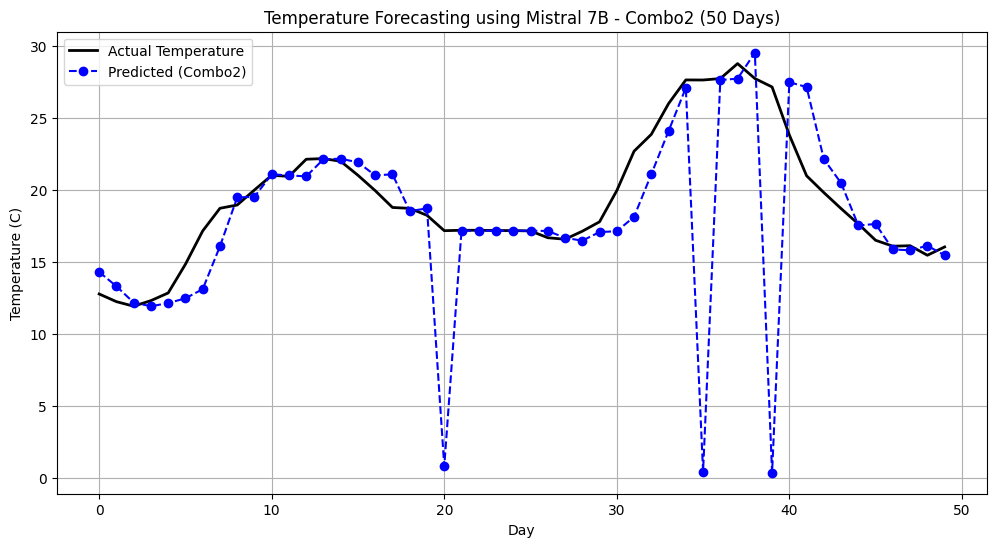


Metrics for Combo2:
RMSE: 6.1227 °C
MAE: 2.5059 °C
R²: -1.0049

Predicting for Combo3:
⏳ Predicting for day 1/50
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], predict the next day's temperature. Reply with a number.
A: 12.877
⏳ Predicting for day 2/50
-> Temperature (C): [15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778, 12.8], Hu

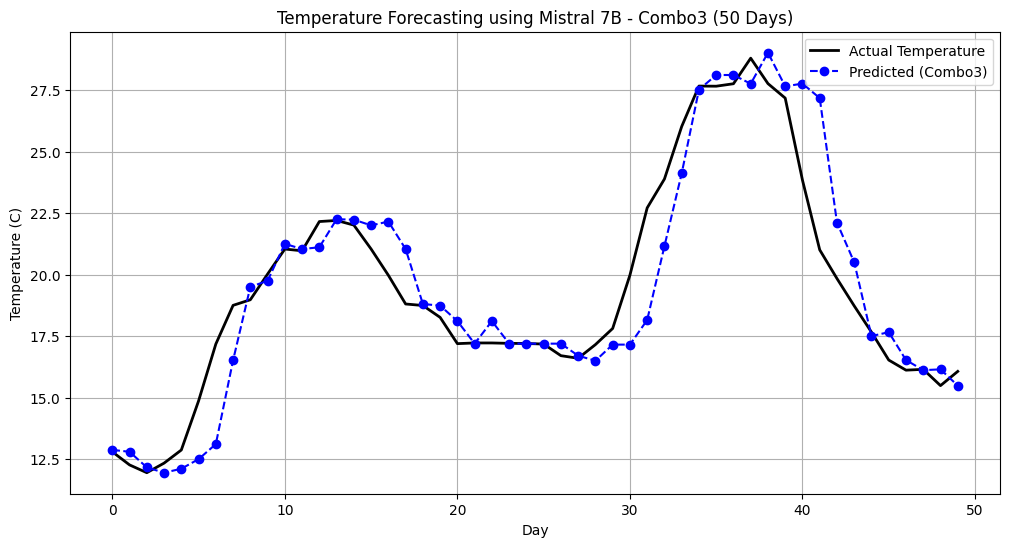


Metrics for Combo3:
RMSE: 1.7343 °C
MAE: 1.1115 °C
R²: 0.8391

Predicting for Combo4:
⏳ Predicting for day 1/50
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517, 15.021300000000002, 15.7297, 15.7297, 14.876400000000002]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517, 15.021300000000002, 15.7297, 15.7297, 14.876400000000002], predict the next day's temp

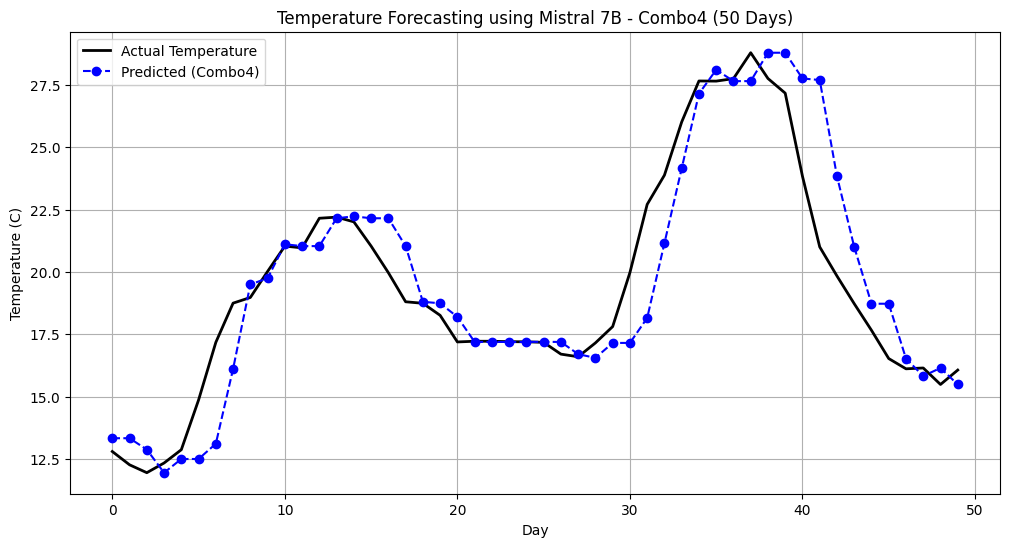


Metrics for Combo4:
RMSE: 1.8980 °C
MAE: 1.2534 °C
R²: 0.8073

Predicting for Combo5:
⏳ Predicting for day 1/50
-> Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517, 15.021300000000002, 15.7297, 15.7297, 14.876400000000002], Pressure (millibars): [1013.41, 1013.37, 1013.77, 1013.96, 1013.77, 1013.77, 1013.92]

Raw Mistral output: Given the past 7 days of weather data: Temperature (C): [16.11111111111111, 15.95, 15.366666666666664, 15.366666666666664, 14.327777777777776, 13.333333333333334, 12.877777777777778], Humidity: [0.93, 0.93, 0.96, 0.94, 0.93, 0.96, 0.93], Wind Speed (km/h): [9.66, 0.5152, 3.2039, 6.552700000000001, 3.4293, 6.6654, 3.6064000000000007], Visibility (km): [9.982, 10.2557, 16.0517,

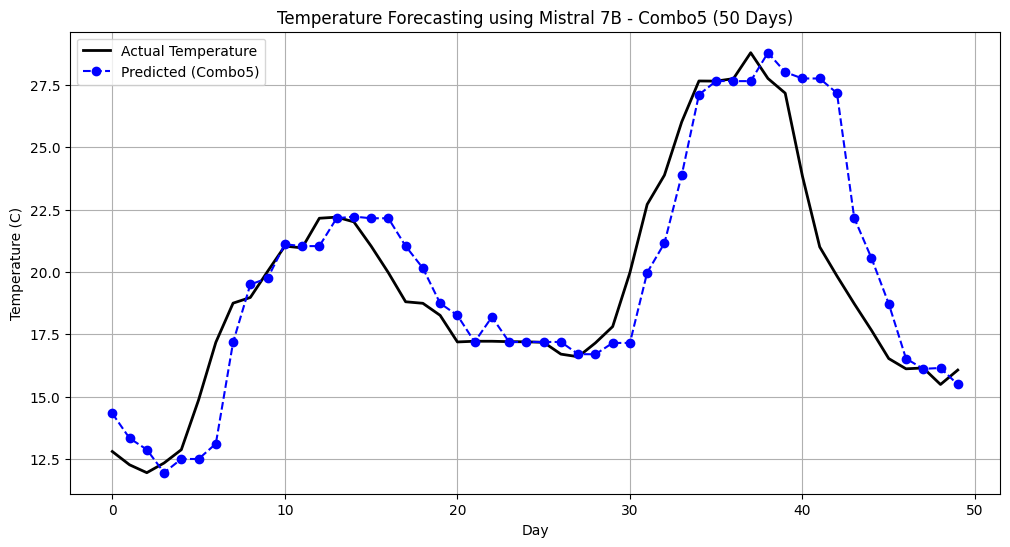


Metrics for Combo5:
RMSE: 2.0913 °C
MAE: 1.3630 °C
R²: 0.7661


In [29]:
# Dictionary to store predictions and metrics
results_50 = {}

# Get predictions and plot for each combo separately
for combo_name, X_combo_sample in X_combos_50.items():
    print(f"\nPredicting for {combo_name}:")
    combo_predictions = []
    for idx, input_series in enumerate(X_combo_sample):
        print(f"⏳ Predicting for day {idx + 1}/{len(X_combo_sample)}")
        pred = query_mistral(input_series, feature_combos[combo_name])
        combo_predictions.append(pred)

    # Store predictions
    results_50[combo_name] = {
        'predictions': combo_predictions,
        'rmse': np.sqrt(mean_squared_error(y_actual_50, combo_predictions)),
        'mae': mean_absolute_error(y_actual_50, combo_predictions),
        'r2': r2_score(y_actual_50, combo_predictions)
    }

    # Plot actual vs predicted for this combination
    plt.figure(figsize=(12, 6))
    plt.plot(range(50), y_actual_50, label='Actual Temperature', color='black', linewidth=2)
    plt.plot(range(50), combo_predictions, label=f'Predicted ({combo_name})', linestyle='--', marker='o', color='blue')
    plt.xlabel('Day')
    plt.ylabel('Temperature (C)')
    plt.title(f'Temperature Forecasting using Mistral 7B - {combo_name} (50 Days)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print individual metrics (optional, can remove if table is sufficient)
    print(f"\nMetrics for {combo_name}:")
    print(f"RMSE: {results_50[combo_name]['rmse']:.4f} °C")
    print(f"MAE: {results_50[combo_name]['mae']:.4f} °C")
    print(f"R²: {results_50[combo_name]['r2']:.4f}")


In [30]:
summary_data_50 = {
    'Combination': [f"{combo_name}: {', '.join(feature_combos[combo_name])}" for combo_name in results_50.keys()],
    'RMSE (°C)': [results_50[combo_name]['rmse'] for combo_name in results_50.keys()],
    'MAE (°C)': [results_50[combo_name]['mae'] for combo_name in results_50.keys()],
    'R²': [results_50[combo_name]['r2'] for combo_name in results_50.keys()]
}
summary_df_50 = pd.DataFrame(summary_data_50)

summary_df_50

# print("\nSummary of All Combinations:")
# print(summary_df_50.to_string(index=False, float_format="{:.4f}".format))

,Combination,RMSE (°C),MAE (°C),R²
0,Combo1: Temperature (C),1.091774,0.784598,0.936251
1,"Combo2: Temperature (C), Humidity",6.122661,2.505900,-1.004874
2,"Combo3: Temperature (C), Humidity, Wind Speed ...",1.734269,1.111536,0.839143
3,"Combo4: Temperature (C), Humidity, Wind Speed ...",1.897997,1.253402,0.807337
4,"Combo5: Temperature (C), Humidity, Wind Speed ...",2.091330,1.363013,0.766089
